## Stage 1: Installing dependencies and notebook gpu setup

## Stage 2: Importing dependencies for the project

In [59]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
%matplotlib inline
tf.__version__

'2.3.1'

## Stage 3: Dataset preprocessing

### Loading the Cifar10 dataset

In [60]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [61]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Image normalization

In [62]:
X_train = X_train / 255.0

In [63]:
X_train.shape

(50000, 32, 32, 3)

In [64]:
X_test = X_test / 255.0
X_test.shape

(10000, 32, 32, 3)

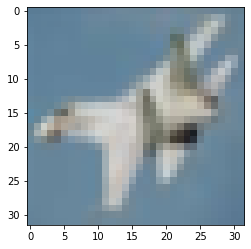

In [65]:
plt.imshow(X_test[10])

## Stage 4: Building a Convolutional neural network

### Defining the model

In [66]:
model = tf.keras.models.Sequential()

### Adding the first CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [67]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [68]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [69]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third CNN Layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [70]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth CNN Layer and max pool layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [71]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [72]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the Flatten layer

In [73]:
model.add(tf.keras.layers.Flatten())

### Adding the first Dense layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [74]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding a Dropout layer

In [75]:
model.add(tf.keras.layers.Dropout(0.2))

### Adding the second Dense layer (output layer)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [76]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [78]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [79]:
model.fit(X_train, y_train, epochs=8)

Epoch 1/8
1563/1563 [==============================] - 187s 120ms/step - loss: 1.4725 - sparse_categorical_accuracy: 0.4638
Epoch 2/8
1563/1563 [==============================] - 244s 156ms/step - loss: 1.0069 - sparse_categorical_accuracy: 0.6449
Epoch 3/8
1563/1563 [==============================] - 219s 140ms/step - loss: 0.8270 - sparse_categorical_accuracy: 0.7098
Epoch 4/8
1563/1563 [==============================] - 242s 155ms/step - loss: 0.7135 - sparse_categorical_accuracy: 0.7505s - loss: 0
Epoch 5/8
1563/1563 [==============================] - 252s 161ms/step - loss: 0.6202 - sparse_categorical_accuracy: 0.7804
Epoch 6/8
1563/1563 [==============================] - 244s 156ms/step - loss: 0.5412 - sparse_categorical_accuracy: 0.8068
Epoch 7/8
1563/1563 [==============================] - 223s 142ms/step - loss: 0.4768 - sparse_categorical_accuracy: 0.8282
Epoch 8/8
1563/1563 [==============================] - 5407s 3s/step - loss: 0.4175 - sparse_categorical_accuracy: 0.8498

### Model evaluation and prediction

In [81]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.8257 - sparse_categorical_accuracy: 0.7439: 0s - loss: 0.8249 - sparse_categorical_accuracy: 0.7


In [82]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7439000010490417


## Stage 5 : Saving the model

### Saving the architecture (topology) of the network

In [84]:
model_json = model.to_json()
with open("convolutional.json", "w") as json_file:
    json_file.write(model_json)

### Saving network weights

In [85]:
model.save_weights("convolutional.h5")

In [86]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
with open("objectdetec.tflite", "wb") as tflite:
    tflite.write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpsvsgteo5\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpsvsgteo5\assets


In [87]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
with open("odlabel.txt", 'w') as f:
    f.write('\n'.join(class_names))